<a href="https://colab.research.google.com/github/Yewon9/STT/blob/main/EDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pydub

In [ ]:
import pandas as pd
from pydub import AudioSegment
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa
import numpy as np
import seaborn as sns
import re

# 일반 음성 데이터

In [6]:
general = pd.read_csv('general.csv')

In [7]:
general

,Path,Text
0,/content/drive/MyDrive/project/data_aihub/4/5e...,편하게 좋은 곳으로 갔겠지? 응. 힘을 내야되는데 어떡하지.
1,/content/drive/MyDrive/project/data_aihub/5_2/...,내가 받은 선물이 궁금한거야? 보고싶어? 그래. 나중에 보여줄게.
2,/content/drive/MyDrive/project/data_aihub/4/5e...,아직 말씀 안 드렸어. 어떡하지.
3,/content/drive/MyDrive/project/data_aihub/5/5e...,오늘도 털어놓았더니 마음이 한결 가벼워졌어. 다음에도 또 부탁해.
4,/content/drive/MyDrive/project/data_aihub/5_2/...,그건 나도 몰라.
...,...,...
9995,/content/drive/MyDrive/project/data_aihub/5/5f...,아빠가 술을 너무 많이 드시고 오니까 가족들이 아빠의 건강이 걱정이 돼서 술 좀 적...
9996,/content/drive/MyDrive/project/data_aihub/5_2/...,프로젝트에 최종 발표를 마쳤으니까 모든 게 완전히 끝난 거야. 마음이 너무나 홀가분해.
9997,/content/drive/MyDrive/project/data_aihub/4/5e...,"아, 어제 아버지가 집에 오시면서 또 계단에서 넘어지셔서 또 다쳤어."
9998,/content/drive/MyDrive/project/data_aihub/4/5e...,나는 다친데가 없어서 아프지 않지만 아픈데가 생기면 병원에 갈게.


## 데이터 개수 확인

In [8]:
print(general.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    10000 non-null  object
 1   Text    10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB
None


In [9]:
print(general.describe())

                                                     Path  \
count                                               10000   
unique                                              10000   
top     /content/drive/MyDrive/project/data_aihub/4/5e...   
freq                                                    1   

                                     Text  
count                               10000  
unique                              10000  
top     편하게 좋은 곳으로 갔겠지? 응. 힘을 내야되는데 어떡하지.  
freq                                    1  


In [10]:
missing_text = general[general['Text'] == '']
print(f"빈 텍스트 개수: {len(missing_text)}")

빈 텍스트 개수: 0


In [11]:
duplicate_texts = general['Text'].duplicated().sum()
print(f"중복된 텍스트 개수: {duplicate_texts}")

중복된 텍스트 개수: 0


## 음성 파일 길이 분석

In [12]:
def get_audio_length(path):
  audio = AudioSegment.from_wav(path)
  return len(audio) / 1000

In [ ]:
general['Audio_Length'] = [get_audio_length(path) for path in tqdm(general['Path'])]

 22%|██▏       | 2230/10000 [24:44<1:34:09,  1.38it/s]

In [ ]:
plt.figure(figsize = (10, 6))
plt.hist(general['Audio_Length'], bins = 30, color = 'blue', alpha = 0.7)
plt.title('Distribution of Audio Lengths')
plt.xlabel('Audio Length (seconds)')
plt.ylabel('Frequency')
plt.show()

## 텍스트 분석

### 불필요한 기호 제거

In [ ]:
def clean_text(text):
    cleaned_text = re.sub(r'[+u/I*]', '', text)
    return cleaned_text

In [ ]:
general['Cleaned_Text'] = general['Text'].apply(clean_text)

In [ ]:
print(general[['Text', 'Cleaned_Text']].head())

### 텍스트 길이 분석

In [ ]:
general['Text_Length'] = general['Text'].apply(len)

In [ ]:
print(general[['Text', 'Text_Length']].head())

In [ ]:
plt.figure(figsize = (10, 6))
plt.hist(general['Text_Length'], bins = 30, color = 'blue', alpha = 0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

### 빈 텍스트 확인

In [ ]:
empty_texts = general[general['Text_Length'] == 0]
print(f"빈 텍스트 개수: {len(empty_texts)}")

### 중복된 텍스트 확인

In [ ]:
duplicate_texts = general[general['Text'].duplicated()]
print(f"중복된 텍스트 개수: {len(duplicate_texts)}")

In [ ]:
general

In [ ]:
general.to_csv('general_eda.csv', index = False, encoding = 'utf-8-sig')

# 구음 장애 음성 데이터

In [ ]:
disorder = pd.read_csv('disorder.csv')

In [ ]:
disorder

,Path,Text
0,/content/drive/MyDrive/project/data/Training/w...,미영이랑 나연이는 단짝입니다. 미영이와 나연이는 노래하며 놉니다. 마루 위에 나란히...
1,/content/drive/MyDrive/project/data/Training/w...,거울 안경 전화 신발 나무 가위 사과 모자 풍선 당근 연필 기차 날개 창문 동생 약...
2,/content/drive/MyDrive/project/data/Training/w...,나는 바지를 입고 단추를 채웁니다. 책상 위에 가방이 있습니다. 가방에 사탕과 연필...
3,/content/drive/MyDrive/project/data/Training/w...,새 해 배 개 집 일 입 이 꿀 불 귤 물 피 쥐 비 귀 콩 돈 공 손 풀 붓 뿔 ...
4,/content/drive/MyDrive/project/data/Training/w...,바지 단추 책상 가방 사탕 연필 자동차 동물원 엄마 뽀뽀 호랑이 꼬리 코끼리 땅콩 ...
...,...,...
309,/content/drive/MyDrive/project/data/Training/w...,제 나이는 서른 일곱 살입니다. 저는 용 띠입니다. 제가 태어난 곳은 동해시이고 주...
310,/content/drive/MyDrive/project/data/Training/w...,100만원 태국 돈으로 얼마야? 10월 14일 로또 당첨자 알려 줘 10월 16일 ...
311,/content/drive/MyDrive/project/data/Training/w...,거짓말을 하는 것이 분명합니다. 고기는 좋아하지만 생선은 싫어한다. 기차를 탈 분은...
312,/content/drive/MyDrive/project/data/Training/w...,100만원 태국 돈으로 얼마야? 10월 14일 로또 당첨자 알려 줘 10월 16일 ...


## 데이터 개수 확인

In [ ]:
print(disorder.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    314 non-null    object
 1   Text    314 non-null    object
dtypes: object(2)
memory usage: 5.0+ KB
None


In [ ]:
print(disorder.describe())

                                                     Path  \
count                                                 314   
unique                                                314   
top     /content/drive/MyDrive/project/data/Training/w...   
freq                                                    1   

                                                     Text  
count                                                 314  
unique                                                314  
top     미영이랑 나연이는 단짝입니다. 미영이와 나연이는 노래하며 놉니다. 마루 위에 나란히...  
freq                                                    1  


In [ ]:
missing_text = disorder[disorder['Text'] == '']
print(f"빈 텍스트 개수: {len(missing_text)}")

빈 텍스트 개수: 0


In [ ]:
duplicate_texts = disorder['Text'].duplicated().sum()
print(f"중복된 텍스트 개수: {duplicate_texts}")

중복된 텍스트 개수: 0


## 음성 파일 길이 분석

In [ ]:
def get_audio_length(path):
  audio = AudioSegment.from_wav(path)
  return len(audio) / 1000

In [ ]:
disorder['Audio_Length'] = [get_audio_length(path) for path in tqdm(disorder['Path'])]

100%|██████████| 314/314 [24:24<00:00,  4.67s/it]


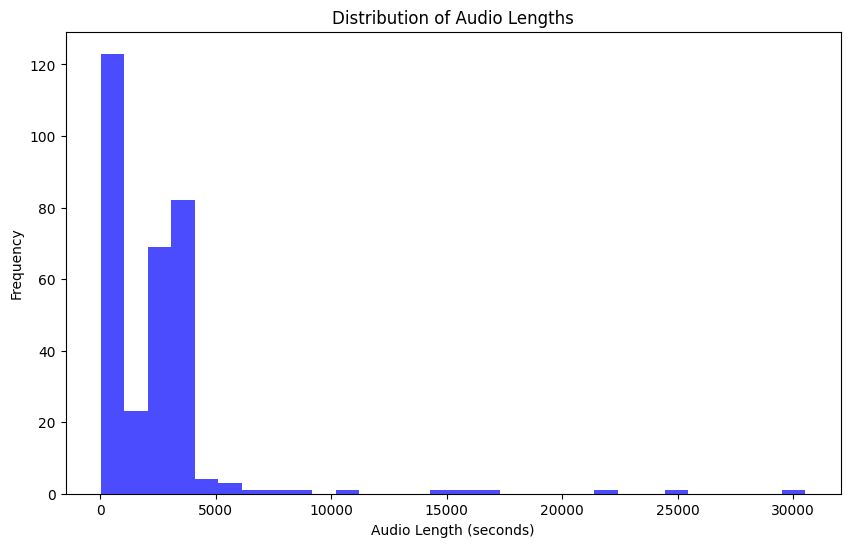

In [ ]:
plt.figure(figsize = (10, 6))
plt.hist(disorder['Audio_Length'], bins = 30, color = 'blue', alpha = 0.7)
plt.title('Distribution of Audio Lengths')
plt.xlabel('Audio Length (seconds)')
plt.ylabel('Frequency')
plt.show()

## 텍스트 분석

### 불필요한 기호 제거

In [ ]:
def clean_text(text):
    cleaned_text = re.sub(r'[+u/I*]', '', text)
    return cleaned_text

In [ ]:
disorder['Cleaned_Text'] = disorder['Text'].apply(clean_text)

In [ ]:
print(disorder[['Text', 'Cleaned_Text']].head())

                                                Text  \
0  미영이랑 나연이는 단짝입니다. 미영이와 나연이는 노래하며 놉니다. 마루 위에 나란히...   
1  거울 안경 전화 신발 나무 가위 사과 모자 풍선 당근 연필 기차 날개 창문 동생 약...   
2  나는 바지를 입고 단추를 채웁니다. 책상 위에 가방이 있습니다. 가방에 사탕과 연필...   
3  새 해 배 개 집 일 입 이 꿀 불 귤 물 피 쥐 비 귀 콩 돈 공 손 풀 붓 뿔 ...   
4  바지 단추 책상 가방 사탕 연필 자동차 동물원 엄마 뽀뽀 호랑이 꼬리 코끼리 땅콩 ...   

                                        Cleaned_Text  
0  미영이랑 나연이는 단짝입니다. 미영이와 나연이는 노래하며 놉니다. 마루 위에 나란히...  
1  거울 안경 전화 신발 나무 가위 사과 모자 풍선 당근 연필 기차 날개 창문 동생 약...  
2  나는 바지를 입고 단추를 채웁니다. 책상 위에 가방이 있습니다. 가방에 사탕과 연필...  
3  새 해 배 개 집 일 입 이 꿀 불 귤 물 피 쥐 비 귀 콩 돈 공 손 풀 붓 뿔 ...  
4  바지 단추 책상 가방 사탕 연필 자동차 동물원 엄마 뽀뽀 호랑이 꼬리 코끼리 땅콩 ...  


### 텍스트 길이 분석

In [ ]:
disorder['Text_Length'] = disorder['Text'].apply(len)

In [ ]:
print(disorder[['Text', 'Text_Length']].head())

                                                Text  Text_Length
0  미영이랑 나연이는 단짝입니다. 미영이와 나연이는 노래하며 놉니다. 마루 위에 나란히...         2038
1  거울 안경 전화 신발 나무 가위 사과 모자 풍선 당근 연필 기차 날개 창문 동생 약...          215
2  나는 바지를 입고 단추를 채웁니다. 책상 위에 가방이 있습니다. 가방에 사탕과 연필...          335
3  새 해 배 개 집 일 입 이 꿀 불 귤 물 피 쥐 비 귀 콩 돈 공 손 풀 붓 뿔 ...          299
4  바지 단추 책상 가방 사탕 연필 자동차 동물원 엄마 뽀뽀 호랑이 꼬리 코끼리 땅콩 ...           89


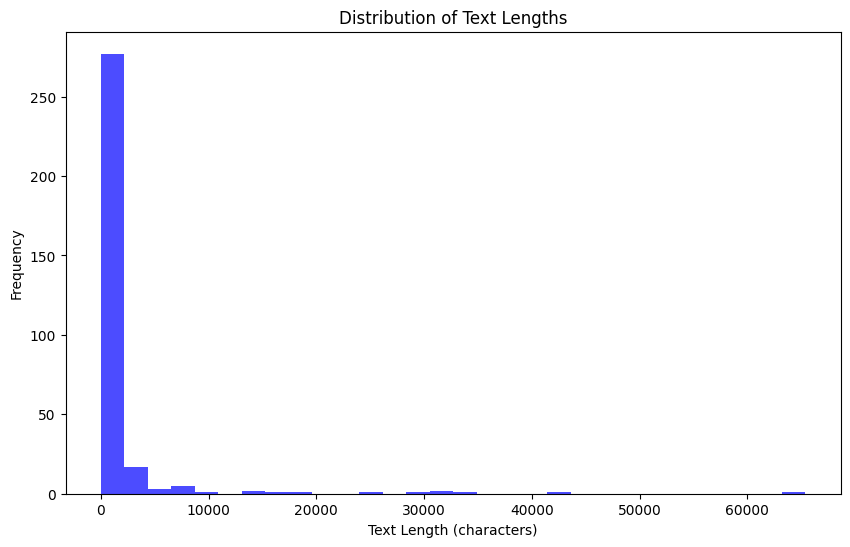

In [ ]:
plt.figure(figsize = (10, 6))
plt.hist(disorder['Text_Length'], bins = 30, color = 'blue', alpha = 0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

### 빈 텍스트 확인

In [ ]:
empty_texts = disorder[disorder['Text_Length'] == 0]
print(f"빈 텍스트 개수: {len(empty_texts)}")

빈 텍스트 개수: 0


### 중복된 텍스트 확인

In [ ]:
duplicate_texts = disorder[disorder['Text'].duplicated()]
print(f"중복된 텍스트 개수: {len(duplicate_texts)}")

중복된 텍스트 개수: 0


In [ ]:
disorder

,Path,Text,Audio_Length,Cleaned_Text,Text_Length
0,/content/drive/MyDrive/project/data/Training/w...,미영이랑 나연이는 단짝입니다. 미영이와 나연이는 노래하며 놉니다. 마루 위에 나란히...,772.163,미영이랑 나연이는 단짝입니다. 미영이와 나연이는 노래하며 놉니다. 마루 위에 나란히...,2038
1,/content/drive/MyDrive/project/data/Training/w...,거울 안경 전화 신발 나무 가위 사과 모자 풍선 당근 연필 기차 날개 창문 동생 약...,206.577,거울 안경 전화 신발 나무 가위 사과 모자 풍선 당근 연필 기차 날개 창문 동생 약...,215
2,/content/drive/MyDrive/project/data/Training/w...,나는 바지를 입고 단추를 채웁니다. 책상 위에 가방이 있습니다. 가방에 사탕과 연필...,709.480,나는 바지를 입고 단추를 채웁니다. 책상 위에 가방이 있습니다. 가방에 사탕과 연필...,335
3,/content/drive/MyDrive/project/data/Training/w...,새 해 배 개 집 일 입 이 꿀 불 귤 물 피 쥐 비 귀 콩 돈 공 손 풀 붓 뿔 ...,1490.877,새 해 배 개 집 일 입 이 꿀 불 귤 물 피 쥐 비 귀 콩 돈 공 손 풀 붓 뿔 ...,299
4,/content/drive/MyDrive/project/data/Training/w...,바지 단추 책상 가방 사탕 연필 자동차 동물원 엄마 뽀뽀 호랑이 꼬리 코끼리 땅콩 ...,276.963,바지 단추 책상 가방 사탕 연필 자동차 동물원 엄마 뽀뽀 호랑이 꼬리 코끼리 땅콩 ...,89
...,...,...,...,...,...
309,/content/drive/MyDrive/project/data/Training/w...,제 나이는 서른 일곱 살입니다. 저는 용 띠입니다. 제가 태어난 곳은 동해시이고 주...,920.580,제 나이는 서른 일곱 살입니다. 저는 용 띠입니다. 제가 태어난 곳은 동해시이고 주...,724
310,/content/drive/MyDrive/project/data/Training/w...,100만원 태국 돈으로 얼마야? 10월 14일 로또 당첨자 알려 줘 10월 16일 ...,3816.600,100만원 태국 돈으로 얼마야? 10월 14일 로또 당첨자 알려 줘 10월 16일 ...,4211
311,/content/drive/MyDrive/project/data/Training/w...,거짓말을 하는 것이 분명합니다. 고기는 좋아하지만 생선은 싫어한다. 기차를 탈 분은...,2753.132,거짓말을 하는 것이 분명합니다. 고기는 좋아하지만 생선은 싫어한다. 기차를 탈 분은...,200
312,/content/drive/MyDrive/project/data/Training/w...,100만원 태국 돈으로 얼마야? 10월 14일 로또 당첨자 알려 줘 10월 16일 ...,4320.615,100만원 태국 돈으로 얼마야? 10월 14일 로또 당첨자 알려 줘 10월 16일 ...,4190


In [ ]:
disorder.to_csv('disorder_eda.csv', index = False, encoding = 'utf-8-sig')